In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
column_names = ['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']

In [6]:
congress_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', 
                            names = column_names)

In [7]:
# convert '?' (no votes) to 'n' for a vote of 'no' - yes, this biases data
congress_data = congress_data.replace('?', 'n')

In [8]:
# convert y/n to 1/0
for col in congress_data.columns[1:]:
    congress_data[col] = congress_data[col].map({'y': 1, 'n': 0})

## EDA w/ Graphs

### Seaborn Count Plot (sns.countplot())

([<matplotlib.axis.XTick at 0x16cae766ac8>,
 <a list of 2 Text xticklabel objects>)

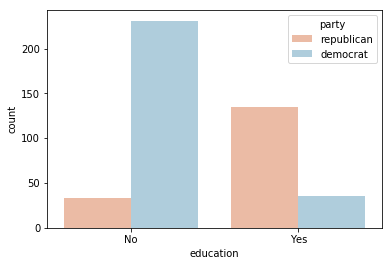

In [10]:
plt.figure()
sns.countplot(x='education', hue='party', data=congress_data, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])

([<matplotlib.axis.XTick at 0x16cae9ec710>,
 <a list of 2 Text xticklabel objects>)

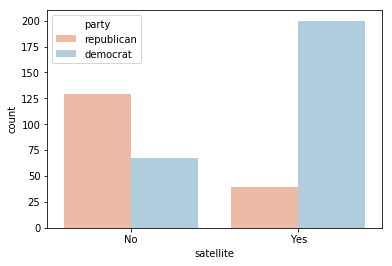

In [11]:
plt.figure()
sns.countplot(x='satellite', hue='party', data=congress_data, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])

([<matplotlib.axis.XTick at 0x16caea538d0>,
 <a list of 2 Text xticklabel objects>)

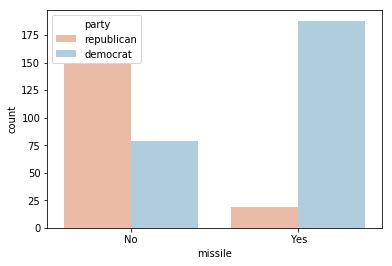

In [12]:
plt.figure()
sns.countplot(x='missile', hue='party', data=congress_data, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])

### Classifier using k-nearest neighbor (k-NN)

In [18]:
# build predictor and target df
X, y = congress_data.drop('party', axis=1).values, congress_data['party'].values

Note the use of .drop() to drop the target variable 'party' from the feature array X as well as the use of the .values attribute to ensure X and y are NumPy arrays. Without using .values, X and y are a DataFrame and Series respectively; the scikit-learn API will accept them in this form also as long as they are of the right shape.

In [13]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

In [19]:
# Create a k-NN classifier with 6 neighbors
neigh = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
neigh.fit(X, y) 

# Predict the labels for the training data X
y_pred = neigh.predict(X)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [25]:
d = [0.556024,  0.746953,  0.879289,  0.218048,  0.990231,  0.011356,  0.129097,
    0.45305,  0.182197,  0.835576,  0.267043,  0.069961,  0.166443,  0.983691,
    0.712795,  0.498825]

X_new = pd.DataFrame(data=d)

X_new = X_new.T

In [32]:
# Predict and print the label for the new data df X_new
new_prediction = neigh.predict(X_new)
print("Prediction: {}".format(new_prediction))

Prediction: ['democrat']
